# A general user guide

1. Copy this drosophila_counting.ipynb to the folder with Max projected images.
2. Open Terminal on Mac.
3. Drag the folder containing this program and images onto the Terminal icon.   
   A Chrome/Safari window would pop up with the file list of the current folder.
4. Open this drosophila_counting.ipynb on Chrome/Safari.  
   A new tab/window will pop up.
5. Go through all the cells inside this program by **'shift + enter'**.
6. For each Max projected image, a png file that shows the counting will be saved.  
   And a csv file that shows all the measurements for each images will be saved and will be used for further analysis    and plotting.

In [1]:
# import the modules that we need and specify the folder which contains the files
import pandas as pd
import glob, os
import numpy as np
import matplotlib as mpl

from pylab import imshow
from skimage import io
import skimage
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = 'none'

from skimage.feature import blob_log
from math import sqrt

In [10]:
def blob_counting(file):
    image = io.imread(file)
    DNA = image[2, ..., 0]
    green = image[1, ..., 0]
    
    dna_blobs_log = blob_log(DNA, max_sigma=20, min_sigma = 5, num_sigma=5, overlap = 0.5, threshold=.08)
    dna_blobs_log[:, 2] = dna_blobs_log[:, 2] * sqrt(2)
    
    green_blobs_log = blob_log(green, max_sigma=20, min_sigma = 4, num_sigma=5, overlap = 0.5, threshold=.04)
    green_blobs_log[:, 2] = green_blobs_log[:, 2] * sqrt(2)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharex=True, sharey=True,
                             subplot_kw={'adjustable': 'box-forced'})
    plt.tight_layout()
    
    ax1.imshow(DNA, interpolation = 'nearest')
    ax1.set_axis_off()
    ax1.set_title(file.split('.')[0] + '_DNA')
    for blob in dna_blobs_log:
        y, x, r = blob
        c = plt.Circle((x, y), r, color= 'cyan', linewidth=1.5, fill=False)
        ax1.add_patch(c)
        
    ax2.imshow(green, interpolation = 'nearest')
    ax2.set_axis_off()
    ax2.set_title(file.split('.')[0] + '_green')
    for blob in green_blobs_log:
        y, x, r = blob
        c = plt.Circle((x, y), r, color= 'green', linewidth=1.5, fill=False)
        ax2.add_patch(c)
    fig.savefig(file.split('.')[0] + '_analysis')
    
    return [len(dna_blobs_log), len(green_blobs_log)]

CPU times: user 10.4 s, sys: 674 ms, total: 11.1 s
Wall time: 11.3 s


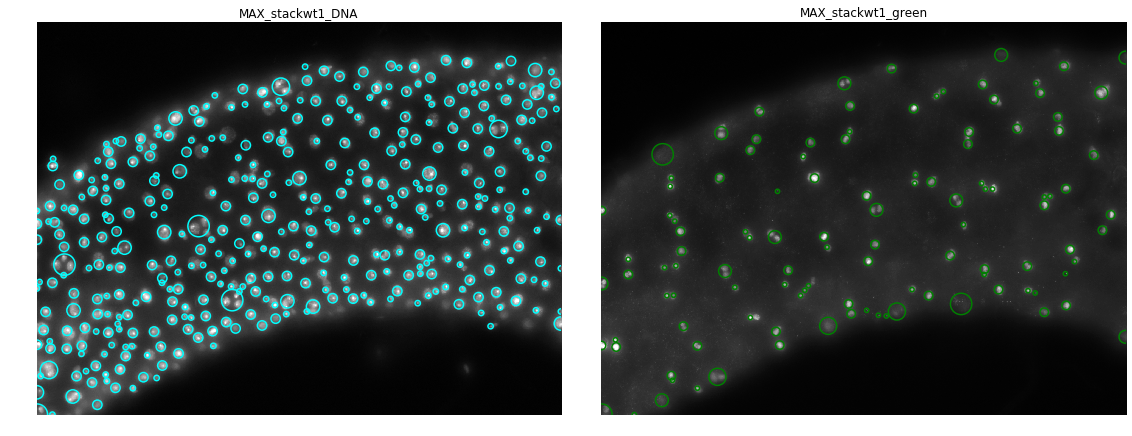

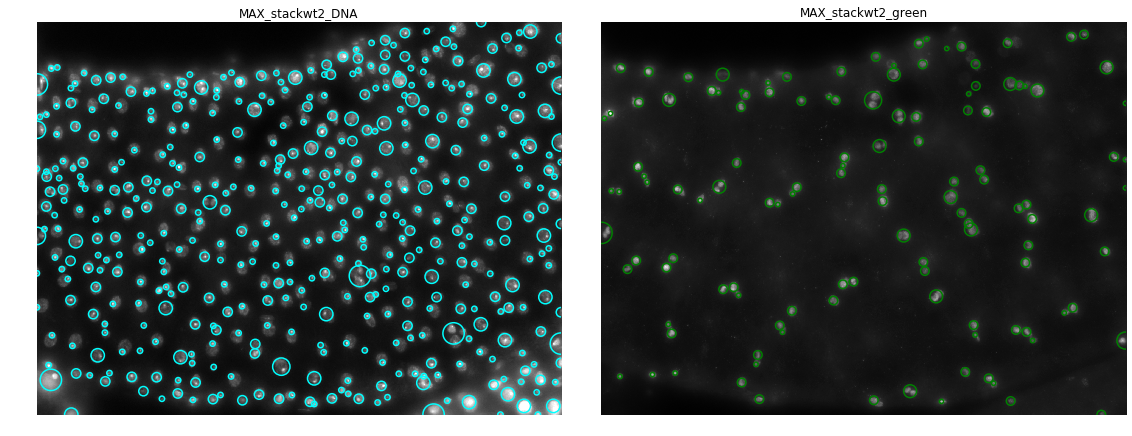

In [11]:
%%time

current_path = %pwd
file_list = os.listdir(current_path)
file_list = [i for i in file_list if i[:3] == 'MAX' and i[-3:] == 'tif']
result_dictionary = {}
for file in file_list:
    result_dictionary[file.split('.')[0]] = blob_counting(file)

In [5]:
analysis = pd.DataFrame(result_dictionary, index = ['blue', 'green'])
analysis = analysis.transpose()
analysis.to_csv('measurement_result.csv')
analysis

,blue,green
MAX_stackwt1,393,114
MAX_stackwt2,460,125
